In [1]:
import numpy as np
from numpy.linalg import norm
import pandas as pd
import pygal
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from IPython.display import display

## SVM Data

In [2]:
data = pd.read_csv('MNIST_SVM.csv')

In [3]:
to_str = np.vectorize(lambda x: str(x))
y = to_str(data.label.values)
Xcols = np.delete(data.columns.values, 0)
X = data[Xcols]

# (a) [Support Vector Classifier]

In [4]:
for c in [10, 0.1, 0.01]:
    svc = SVC(C=c, kernel='linear')
    svc.fit(X, y)
    print('C = ', c)
    print('Numer of support vectors: ', svc.support_.size)
    print('Confusion matrix:')
    ry = svc.predict(X)
    display(pd.crosstab(pd.Series(y, name='Actual'), pd.Series(ry, name='Predicted'), margins=True))

C =  10
Numer of support vectors:  200
Confusion matrix:


Predicted     0     2   All
Actual                     
0          3454     0  3454
2             0  3545  3545
All        3454  3545  6999

C =  0.1
Numer of support vectors:  227
Confusion matrix:


Predicted     0     2   All
Actual                     
0          3446     8  3454
2             9  3536  3545
All        3455  3544  6999

C =  0.01
Numer of support vectors:  393
Confusion matrix:


Predicted     0     2   All
Actual                     
0          3435    19  3454
2            25  3520  3545
All        3460  3539  6999

# (b) [Kernel based SVM]

In [5]:
roc = []
for d in range(1, 4):
    svm = SVC(kernel='poly', degree=d)
    svm.fit(X, y)
    fpr, tpr, _ = roc_curve(y, svm.decision_function(X), pos_label='0')
    roc.append(list(zip(list(tpr), list(fpr))))

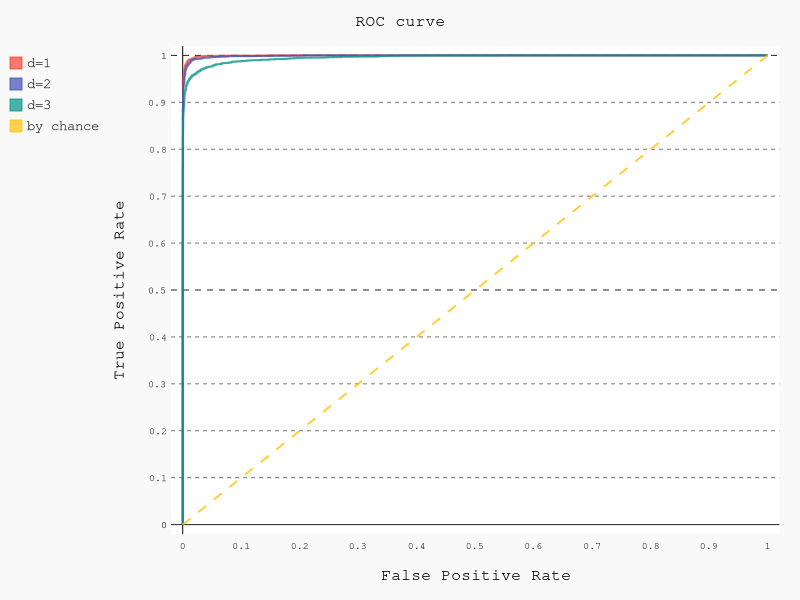

In [6]:
plot = pygal.XY(title = 'ROC curve', x_title='False Positive Rate', y_title='True Positive Rate')
plot.add('d=1', roc[0], show_dots=False, stroke_style={'width': 2})
plot.add('d=2', roc[1], show_dots=False, stroke_style={'width': 2})
plot.add('d=3', roc[2], show_dots=False, stroke_style={'width': 2})
plot.add('by chance', [(0, 0), (1, 1)], show_dots=False, stroke_style={'width': 2, 'dasharray': 10})

# (c) [Clustering]

In [7]:
data = pd.read_csv('MNIST_clustering.csv')

In [8]:
y = to_str(data.label.values)
Xcols = np.delete(data.columns.values, 0)
X = StandardScaler().fit_transform(data[Xcols])

In [9]:
pca = PCA(n_components=2)
rX = pca.fit_transform(X)

In [10]:
pts_pca = {'0': [], '2': [], '4': []}
for i, c in enumerate(y):
    pts_pca[c].append(tuple(rX[i]))

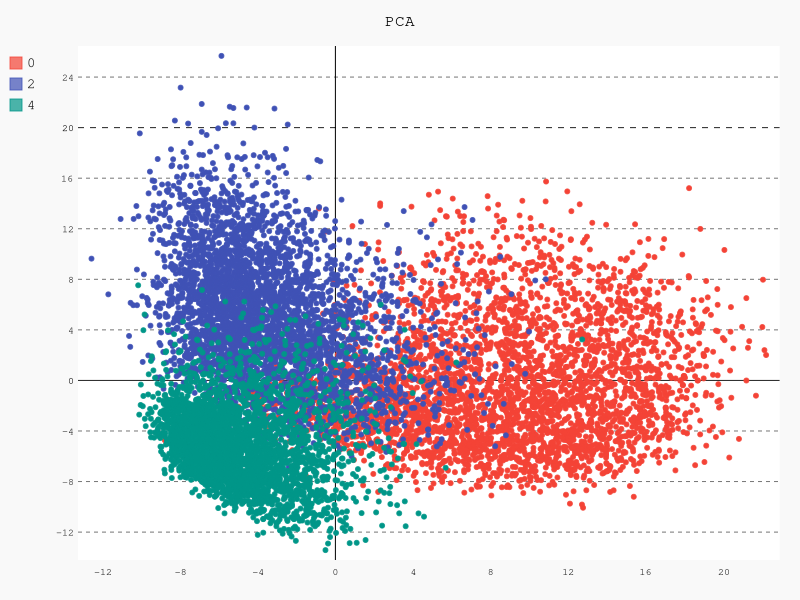

In [11]:
pygal.XY(title = 'PCA', stroke=False).add('0', pts_pca['0']).add('2', pts_pca['2']).add('4', pts_pca['4'])

In [12]:
sec = len(rX) // 3
remain = len(rX) - 2 * sec
clusters = [0] * sec + [1] * sec + [2] * remain
while True:
    centroids = [np.zeros(2), np.zeros(2), np.zeros(2)]
    for i, c in enumerate(clusters):
        centroids[c] = centroids[c] + rX[i]
    for c in range(3):
        centroids[c] = centroids[c] / clusters.count(c)
    nc = [np.argmin(norm(centroids - p, axis=1)) for p in rX]
    if nc == clusters:
        break
    clusters = nc

In [13]:
ry = list(map(lambda x: '0' if x == 2 else '2' if x == 0 else '4', clusters))

In [14]:
pts_kmeans = [[], [], []]
for i, c in enumerate(clusters):
    pts_kmeans[c].append(tuple(rX[i]))

In [15]:
print('Confusion matrix:')
pd.crosstab(pd.Series(y, name='Actual'), pd.Series(ry, name='Predicted'), margins=True)

Confusion matrix:


Predicted     0     2     4    All
Actual                            
0          2989   152   511   3652
2           158  2841   755   3754
4            10   112  3471   3593
All        3157  3105  4737  10999

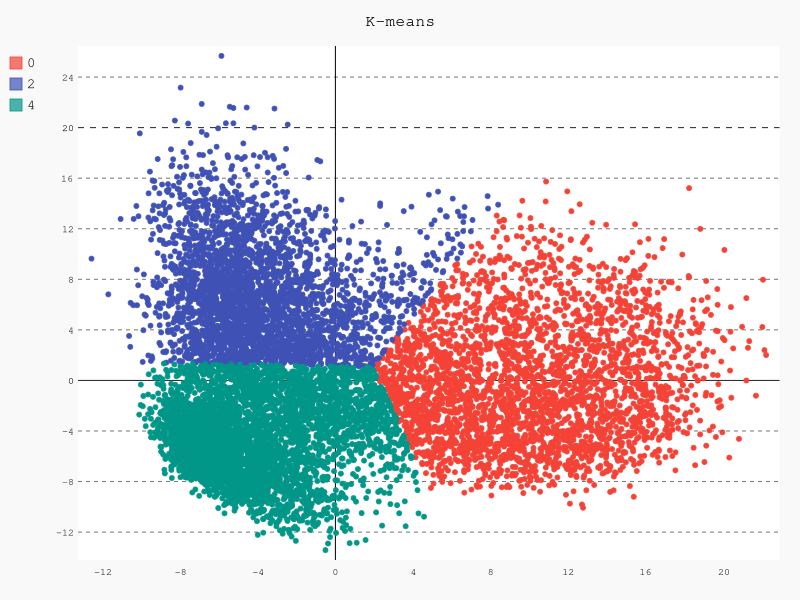

In [16]:
pygal.XY(title = 'K-means', stroke=False).add('0', pts_kmeans[2]).add('2', pts_kmeans[0]).add('4', pts_kmeans[1])